In [ ]:
!pip install gmshparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/ArmandoCivini/AN2_TP2.git
# si esto tira "fatal: destination path 'AN2_TP2' already exists and is not an empty directory."
#no pasa nada significa que el repo ya esta clonado
#si actualizaste el repo y queres clonarlo devuelta solo hay que borrar la carpeta

Cloning into 'AN2_TP2'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 28 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), 204.34 KiB | 6.01 MiB/s, done.


In [ ]:
import gmshparser
mesh = gmshparser.parse("AN2_TP2/ipn2.msh") #para cambiar la malla hay que subirla al github y despues cambiar el nombre aca
                                            #el path es diferente si lo estas corriendo local
print(mesh)

Mesh name: AN2_TP2/ipn2.msh
Mesh version: 4.1
Number of nodes: 46
Minimum node tag: 1
Maximum node tag: 46
Number of node entities: 21
Number of elements: 52
Minimum element tag: 1
Maximum element tag: 52
Number of element entities: 1


In [ ]:
cont = 0
nodes = [] #aca guardo todos los nodos juntos para no tener que andar recorriendo entidades
for entity in mesh.get_node_entities():
    print("entidad: " + str(cont))
    cont += 1
    for node in entity.get_nodes():
        nid = node.get_tag()
        ncoords = node.get_coordinates()
        print("Node id = %s, node coordinates = %s" % (nid, ncoords))
        nodes.append(node)

entidad: 0
Node id = 1, node coordinates = (0.0, 600.0, 0.0)
entidad: 1
Node id = 2, node coordinates = (215.0, 600.0, 0.0)
entidad: 2
Node id = 3, node coordinates = (215.0, 567.0, 0.0)
entidad: 3
Node id = 4, node coordinates = (118.0, 567.0, 0.0)
entidad: 4
Node id = 5, node coordinates = (118.0, 33.0, 0.0)
entidad: 5
Node id = 6, node coordinates = (215.0, 33.0, 0.0)
entidad: 6
Node id = 7, node coordinates = (215.0, 0.0, 0.0)
entidad: 7
Node id = 8, node coordinates = (0.0, 0.0, 0.0)
entidad: 8
Node id = 9, node coordinates = (0.0, 33.0, 0.0)
entidad: 9
Node id = 10, node coordinates = (97.0, 33.0, 0.0)
entidad: 10
Node id = 11, node coordinates = (97.0, 567.0, 0.0)
entidad: 11
Node id = 12, node coordinates = (0.0, 567.0, 0.0)
entidad: 12
Node id = 13, node coordinates = (53.74999999996011, 0.0, 0.0)
Node id = 14, node coordinates = (107.4999999999299, 0.0, 0.0)
Node id = 15, node coordinates = (161.2500000000329, 0.0, 0.0)
entidad: 13
Node id = 16, node coordinates = (166.5, 33.

In [ ]:
elements = [] #aca guardo todos los elementos juntos para no tener que andar recorriendo entidades
for entity in mesh.get_element_entities():
    eltype = entity.get_element_type()
    print("Element type: %s" % eltype)
    if eltype != 2:
      continue
    for element in entity.get_elements():
        elid = element.get_tag()
        elcon = element.get_connectivity()
        print("Element id = %s, connectivity = %s" % (elid, elcon))
        elements.append(element)

Element type: 2
Element id = 1, connectivity = [27, 43, 11]
Element id = 2, connectivity = [14, 44, 5]
Element id = 3, connectivity = [10, 45, 14]
Element id = 4, connectivity = [4, 46, 27]
Element id = 5, connectivity = [27, 11, 4]
Element id = 6, connectivity = [10, 14, 5]
Element id = 7, connectivity = [15, 41, 16]
Element id = 8, connectivity = [25, 40, 26]
Element id = 9, connectivity = [38, 39, 13]
Element id = 10, connectivity = [28, 42, 29]
Element id = 11, connectivity = [8, 39, 9]
Element id = 12, connectivity = [2, 40, 3]
Element id = 13, connectivity = [6, 41, 7]
Element id = 14, connectivity = [12, 42, 1]
Element id = 15, connectivity = [29, 43, 28]
Element id = 16, connectivity = [16, 44, 15]
Element id = 17, connectivity = [13, 45, 38]
Element id = 18, connectivity = [26, 46, 25]
Element id = 19, connectivity = [1, 42, 28]
Element id = 20, connectivity = [26, 40, 2]
Element id = 21, connectivity = [3, 40, 25]
Element id = 22, connectivity = [25, 46, 4]
Element id = 23, c

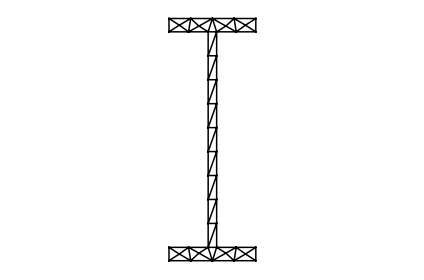

In [ ]:
X, Y, T = gmshparser.helpers.get_triangles(mesh)

import matplotlib.pylab as plt
plt.figure()
plt.triplot(X, Y, T, color='black')
plt.axis('equal')
plt.axis('off')
plt.tight_layout()
#plt.savefig('docs/example_mesh.svg')
plt.show()

In [ ]:
nodes[34-1].get_tag() #la lista de nodos o elementos esta corrida 1 xq los indices empiezan en cero pero la numeracion de nodos o elementos empieza en 1

34

In [ ]:
def node_distance(node1, node2):
  #esta funcion calcula las distancias entre 2 nodos
  #en las formulas serian los lxnode1node2 y lynode1node2
  #es una generalizacion de estas ecuaciones https://github.com/ArmandoCivini/AN2_TP2/blob/main/tp2_pictures/lx_ly_reference.PNG?raw=true
  node1_pos = node1.get_coordinates()
  node2_pos = node2.get_coordinates()

  lx = node2_pos[0] - node1_pos[0]
  ly = node2_pos[1] - node1_pos[1]

  return lx, ly

def local_matrix_row(alfa12, alfa13, alfa123, psi_xi, psi_eta):
  #esta ecuacion calcula la fila de la matriz local
  #el primer valor devuelto se multiplica por el nodo local 1 y asi
  # se basa en esta ecuacion https://raw.githubusercontent.com/ArmandoCivini/AN2_TP2/main/tp2_pictures/row_reference.PNG

  #estos coeficientes se basan en esta ecuacion https://github.com/ArmandoCivini/AN2_TP2/blob/main/tp2_pictures/alfa2_alfa3_reference.PNG?raw=true
  alfa2 = (alfa123 * psi_xi) + (alfa13 * psi_eta)
  alfa3 = -(alfa12 * psi_xi) - (alfa123 * psi_eta)

  return [-(alfa2 + alfa3), alfa2, alfa3]

def calculate_local_matrix(element, nodes):
  nodes_global = element.get_connectivity()
  #consigo los nodos del elemento
  node1 = nodes[nodes_global[0]-1]
  node2 = nodes[nodes_global[1]-1]
  node3 = nodes[nodes_global[2]-1]

  lx12, ly12 = node_distance(node1, node2)
  lx13, ly13 = node_distance(node1, node3)
  #basado en https://github.com/ArmandoCivini/AN2_TP2/blob/main/tp2_pictures/delta_reference.PNG?raw=true
  delta = (lx12 * ly13) - (lx13 * ly12)

  #basado en https://github.com/ArmandoCivini/AN2_TP2/blob/main/tp2_pictures/alfas_reference.PNG?raw=true
  alfa12 = ((lx12 ** 2) + (ly12 ** 2)) / delta
  alfa13 = ((lx13 ** 2) + (ly13 ** 2)) / delta
  alfa123 = ((lx12 * lx13) + (ly12 * ly13)) / delta

  #los coeficientes psi_xi y psi_eta se toman de https://github.com/ArmandoCivini/AN2_TP2/blob/main/tp2_pictures/psi_reference.PNG?raw=true
  #dependiendo de a que nodo local pertenezcan
  row1 = local_matrix_row(alfa12, alfa13, alfa123, -1/2, 1/2)
  row2 = local_matrix_row(alfa12, alfa13, alfa123, 0, -1/2)
  row3 = local_matrix_row(alfa12, alfa13, alfa123, 1/2, 0)

  return [row1, row2, row3]


In [ ]:
len(nodes)

46

In [ ]:
local_matrix_6 = calculate_local_matrix(elements[5], nodes) #devuelve la matriz local del elemento 6
local_matrix_6

[[-0.8652597402608023, 0.15909090909197124, 0.7061688311688311],
 [0.15909090909197124, -0.3181818181818182, 0.15909090908984694],
 [0.7061688311688311, 0.15909090908984694, -0.865259740258678]]

In [ ]:
import numpy as np

global_matrix = np.zeros((len(nodes), len(nodes))) #creo la matriz global de NxN

In [ ]:
#funcion para agregar los valores de una fila de una matriz local a la matriz global
#row_num es el nodo global al cual corresponden los valores locales osea si la matriz global es para los nodos [10, 14, 5] la primera fila en la matriz
#local corresponde a la fila 10 de la matriz global
#values es la fila de la matriz local que queremos agregar y nodes_global son los indices globales de los nodos locales
def add_row_to_global(global_matrix, row_num, values, nodes_global):
  for i, node in enumerate(nodes_global):
    global_matrix[row_num-1][node-1] += values[i]

In [ ]:
#aca recorremos todos los elementos, calculando sus matrices locales y agregando sus valores a la matriz global
%%timeit
for element in elements:
  nodes_global = element.get_connectivity()
  local_matrix = calculate_local_matrix(element, nodes)
  for i, node in enumerate(nodes_global):
    add_row_to_global(global_matrix, node, local_matrix[i], nodes_global)

589 µs ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
global_matrix[1]

array([    0.        , -9328.53460821,  1832.61080008,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        , -2049.95307655,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,  9545.87688468,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ])

In [ ]:
#esta funcion sirve para saber si un nodo pertenece a cierto borde segun su posicion
def is_border(node, xMin, xMax, yMin, yMax):
  pos = node.get_coordinates()
  if pos[0] > xMax or pos[0] < xMin:
    return False
  if pos[1] > yMax or pos[1] < yMin:
    return False
  return True

In [ ]:
#aca generamos listas de los nodos que estan en los bordes para despues definir las condiciones de borde
border_g1 = filter(lambda node: is_border(node, -100, 1000, 599, 601), nodes)

border_t2 = filter(lambda node: is_border(node, -100, 1000, -1, 1), nodes)

border_t3_1 = filter(lambda node: is_border(node, -1, 1, -1000, 1000), nodes)
border_t3_2 = filter(lambda node: is_border(node, -1, 107, 32, 34), nodes)
border_t3_3 = filter(lambda node: is_border(node, -1, 107, 566, 568), nodes)
border_t3_4 = filter(lambda node: is_border(node, 96, 98, 32, 568), nodes)
border_t3 = list(border_t3_1) + list(border_t3_2) + list(border_t3_3) + list(border_t3_4)

border_t1_1 = filter(lambda node: is_border(node, 214, 216, -1000, 1000), nodes)
border_t1_2 = filter(lambda node: is_border(node, 107.6, 216, 32, 34), nodes)
border_t1_3 = filter(lambda node: is_border(node, 107.6, 216, 566, 568), nodes)
border_t1_4 = filter(lambda node: is_border(node, 117, 118, 32, 568), nodes)
border_t1 = list(border_t1_1) + list(border_t1_2) + list(border_t1_3) + list(border_t1_4)

In [ ]:
def eliminate_repeated_nodes(node_list):
  seen = []
  r = []
  for node in node_list:
    id = node.get_tag()
    if not id in seen:
      r.append(node)
    seen.append(id)
  return r

In [ ]:
border_t1 = eliminate_repeated_nodes(border_t1)
border_t3 = eliminate_repeated_nodes(border_t3)

In [ ]:
for node in border_t1_1:
  print(node.get_tag())

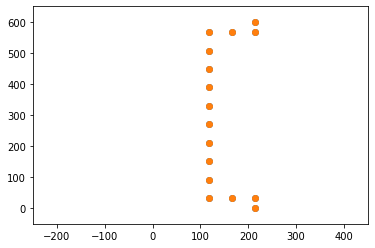

In [ ]:
#esto es para plotear cualquier grupo de nodos
#usado para comprobar que se hayan separado bien los bordes correnspondientes
from matplotlib import pyplot as plt
x_plot = []
y_plot = []

for node in border_t1:
#for node in nodes[97:103]:
  coord = node.get_coordinates()
  x_plot.append(coord[0])
  y_plot.append(coord[1])
#for node in list(border_t1_2):
#for node in nodes[97:103]:
#  coord = node.get_coordinates()
#  x_plot.append(coord[0])
#  y_plot.append(coord[1])
plt.scatter(x_plot,y_plot)
plt.scatter(x_plot,y_plot)
plt.xlim([-250, 450])
plt.ylim([-50, 650])
plt.show()

In [ ]:
#funcion para aplicar la condicion de neumman a un conjunto de nodos
#por cada nodo se aplicara el valor recivido al vector independiente(b)
# y en la matriz global se remplazara su fila por todos zeros y un 1 en la diagonal
def apply_cond_neumman(border_nodes, value, global_matrix, b):
  for node in border_nodes:
    id = node.get_tag()
    b[id-1] = value
    global_matrix[id-1] = np.zeros(len(b))
    global_matrix[id-1][id-1] = 1
  return global_matrix, b

In [ ]:
b = np.zeros(len(nodes)) #creo el vector independiente, lo inicializo en zero

In [ ]:
#aplico las condiciones de borde del problema
#para timearlo no podemos asignar a las variables globales
def apply_conds(global_matrix, b, border_t1, border_t2, border_t3):
  global_matrix, b = apply_cond_neumman(border_t1, 18, global_matrix, b)
  global_matrix, b = apply_cond_neumman(border_t2, 20, global_matrix, b)
  global_matrix, b = apply_cond_neumman(border_t3, 16, global_matrix, b)
  return global_matrix, b

In [ ]:
%%timeit
_global_matrix, _b = apply_conds(global_matrix, b, border_t1, border_t2, border_t3)

80 µs ± 26.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
global_matrix, b = apply_conds(global_matrix, b, border_t1, border_t2, border_t3)

In [ ]:
b

array([16., 18., 18., 18., 18., 18., 18., 16., 16., 16., 16., 16., 20.,
       20., 20., 18., 18., 18., 18., 18., 18., 18., 18., 18., 18.,  0.,
        0.,  0., 16., 16., 16., 16., 16., 16., 16., 16., 16., 16.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
global_matrix

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -3.6653966e+04,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00, -3.6653966e+04,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00, -3.6653966e+04]])

In [ ]:
#resuelvo el sistema de ecuaciones de tipo Ax=b siendo A la matriz global
x = np.linalg.solve(global_matrix, b)
x

array([16.        , 18.        , 18.        , 18.        , 18.        ,
       18.        , 18.        , 16.        , 16.        , 16.        ,
       16.        , 16.        , 20.        , 20.        , 20.        ,
       18.        , 18.        , 18.        , 18.        , 18.        ,
       18.        , 18.        , 18.        , 18.        , 18.        ,
       17.98392196, 17.        , 16.01607804, 16.        , 16.        ,
       16.        , 16.        , 16.        , 16.        , 16.        ,
       16.        , 16.        , 16.        , 16.93148882, 17.99625587,
       18.46574441, 16.00374413, 16.1540816 , 18.86748046, 17.73496093,
       17.8459184 ])

In [ ]:
%%timeit
np.linalg.solve(global_matrix, b)

207 µs ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
#temperaturas resultantes segun el nodo
#usado para generar el nodeData en el .msh
print(len(nodes))
for i, temp in enumerate(x):
  print(f"{i+1} {temp}")

46
1 15.999999999999982
2 17.99999999999992
3 18.000000000000085
4 18.000000000000014
5 17.999999999999993
6 18.000000000000004
7 18.0
8 16.00000000000001
9 16.0
10 16.000000000000004
11 16.00000000000001
12 16.0
13 20.0
14 20.0
15 20.0
16 18.0
17 18.0
18 18.0
19 18.0
20 18.0
21 18.0
22 18.0
23 18.0
24 18.0
25 17.99999999999997
26 17.983921960185572
27 17.00000000000777
28 16.016078039828887
29 15.999999999999995
30 16.0
31 16.0
32 16.0
33 16.0
34 16.0
35 16.0
36 16.0
37 16.0
38 15.999999999999996
39 16.931488823208756
40 17.996255871402163
41 18.46574441160228
42 16.00374412860154
43 16.15408159953783
44 18.867480463257067
45 17.7349609265294
46 17.845918400476684


In [ ]:
def point_in_triangle(A, B, C, P):
    u = ((B[1] - C[1]) * (P[0] - C[0]) + (C[0] - B[0]) * (P[1] - C[1])) / \
        ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))
    
    v = ((C[1] - A[1]) * (P[0] - C[0]) + (A[0] - C[0]) * (P[1] - C[1])) / \
        ((B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1]))

    z = 1 - u - v
    
    if 0 <= u <= 1 and 0 <= v <= 1 and u + v <= 1:
        return True, [u,v,z]
    else:
        return False, []

In [ ]:
def find_element(coordinate):
  for element in elements:
    nodos = element.get_connectivity()
    nodo1 = nodes[nodos[0]-1].get_coordinates()
    nodo2 = nodes[nodos[1]-1].get_coordinates()
    nodo3 = nodes[nodos[2]-1].get_coordinates()
    is_in, baricenter = point_in_triangle(nodo1, nodo2, nodo3, coordinate)
    if is_in:
      return element, baricenter
  return None, None

In [ ]:
#Ejemplo
coordenada = (110, 10)
elemento, baricenter = find_element(coordenada)
elemento.get_connectivity()

[10, 14, 5]

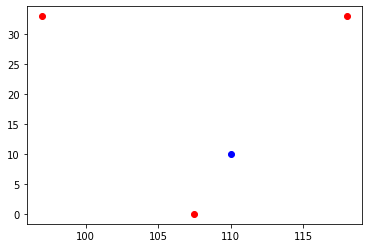

In [ ]:
#para comprobar si el ejemplo funciona, el punto azul debería estar adentro del triangulo formado por los puntos rojos
from matplotlib import pyplot as plt
x_plot = []
y_plot = []

for node_id in elemento.get_connectivity():
  node = nodes[node_id-1]
  coord = node.get_coordinates()
  x_plot.append(coord[0])
  y_plot.append(coord[1])
plt.scatter(x_plot,y_plot,color='red')
plt.scatter([coordenada[0]],[coordenada[1]],color='blue')
#agregar estas lineas si se quiere ver la ubicacion general del triangulo
#plt.xlim([-250, 450])
#plt.ylim([-50, 650])
plt.show()

In [ ]:
baricenter

[0.032467532465205826, 0.696969696969697, 0.27056277056509714]

In [ ]:
def calculate_temperature_baricenter(element, baricenter, x):
  nodes = element.get_connectivity()
  temp = 0
  for i in range(len(nodes)):
    temp += x[nodes[i]-1] * baricenter[i]
  return temp

In [ ]:
calculate_temperature_baricenter(elemento, baricenter, x)

19.32900432900898

In [ ]:
def get_temperature_at(point, x):
  element, baricenter = find_element(point)
  if not element:
    return None
  return calculate_temperature_baricenter(element, baricenter, x)

In [ ]:
get_temperature_at((110, 10), x)

19.32900432900898

In [ ]:
#puntos en donde se van a coomparar los errores.
#agregar mas
reference_points = [(100, 300), (110, 10)]
for point in reference_points:
  print(get_temperature_at(point, x))

16.285714285714285
19.32900432900898


In [ ]:
def calculate_T_point(point, element):
  #calcula la T en un punto (x,y) usando las funciones de forma, ecuacion https://raw.githubusercontent.com/ArmandoCivini/AN2_TP2/main/tp2_pictures/temperatura_en_cualquier_punto.jpeg
    nodes_global = element.get_connectivity()
    node1 = nodes[nodes_global[0]-1]
    node2 = nodes[nodes_global[1]-1]
    node3 = nodes[nodes_global[2]-1]
    node_1_pos = node1.get_coordinates()
    node_2_pos = node2.get_coordinates()
    node_3_pos = node3.get_coordinates()
    node_1_T = x[nodes_global[0]-1]
    node_2_T = x[nodes_global[1]-1]
    node_3_T = x[nodes_global[2]-1]

    xi = (((point[1] - node_1_pos[1]) * (node_3_pos[0] - node_1_pos[0]) - (node_3_pos[1] - node_1_pos[1]) * (point[0] - node_1_pos[0])) /
        ((node_2_pos[1] - node_1_pos[1]) * (node_3_pos[0] - node_1_pos[0]) - (node_3_pos[1] - node_1_pos[1]) * (node_2_pos[0] - node_1_pos[0])))
    eta = (((point[1] - node_1_pos[1]) * (node_2_pos[0] - node_1_pos[0]) - (node_2_pos[1] - node_1_pos[1]) * (point[0] - node_1_pos[0])) /
        ((node_3_pos[1] - node_1_pos[1]) * (node_2_pos[0] - node_1_pos[0]) - (node_2_pos[1] - node_1_pos[1]) * (node_3_pos[0] - node_1_pos[0])))
    
    N1 = 1 - xi - eta
    N2 = xi
    N3 = eta

    T = N1 * node_1_T + N2 * node_2_T + N3 * node_3_T

    return T

<function matplotlib.pyplot.show(*args, **kw)>

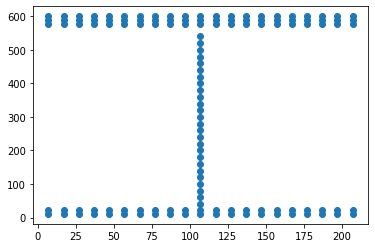

In [ ]:
#arma array de puntos en los que se va a calcular T para comparar error
puntos = [None]*131
for i in range (0, 21):
  puntos[i] = [7+10*i, 11]
for i in range (21, 42):
  puntos[i] = [7+10*(i-21), 22]
for i in range(42, 68):
 puntos[i] = [107, 40+20*(i-42)]
for i in range (68, 89):
  puntos[i] = [7+10*(i-68), 578]
for i in range(89,110):
  puntos[i] = [7+10*(i-89), 589]
for i in range(110, 131):
  puntos[i] = [7+10*(i-110), 600]

import matplotlib.pyplot as plt
import numpy as np

puntos = np.array(puntos)

plt.scatter(puntos[:,0], puntos[:,1])
plt.show

In [ ]:
i = 0
temperaturas = [None]*131
for punto in puntos:
  elemento, baricentro = find_element(punto)
  temperaturas[i] = calculate_T_point(punto, elemento)
  print("coor = %s, T = %s" % (punto, temperaturas[i]))
  i = i+1

coor = [ 7 11], T = 16.255077623959334
coor = [17 11], T = 16.619474229615513
coor = [27 11], T = 17.362077820124025
coor = [37 11], T = 18.039667443122116
coor = [47 11], T = 18.457666925485377
coor = [57 11], T = 18.66666666666783
coor = [67 11], T = 18.66666666666988
coor = [77 11], T = 18.666666666669876
coor = [87 11], T = 18.66666666666988
coor = [97 11], T = 18.666666666668064
coor = [107  11], T = 18.952380952385404
coor = [117  11], T = 19.333333333332597
coor = [127  11], T = 19.333333333331378
coor = [137  11], T = 19.33333333333136
coor = [147  11], T = 19.333333333331364
coor = [157  11], T = 19.333333333332476
coor = [167  11], T = 19.249733436860772
coor = [177  11], T = 19.040733695678224
coor = [187  11], T = 18.71824821238647
coor = [197  11], T = 18.346155189130428
coor = [207  11], T = 18.14575864226189
coor = [ 7 22], T = 16.25507762395933
coor = [17 22], T = 16.619474229615506
coor = [27 22], T = 16.620992548805837
coor = [37 22], T = 16.77948401920102
coor = [47 

In [ ]:
#se consideran exactos los valores calculados en cada punto evaluado con la malla de 1572 elementos
T_exacta = [17.232675812611106, 
 18.135670293662137,
 18.47582668597356,
 18.59634067882311,
 18.640428592847385,
 18.65995589360615,
 18.672215037210464,
 18.688909514278343,
 18.723362302233717,
 18.801510345769046,
 18.92887075065431,
 19.09372413238525,
 19.221469443667935,
 19.285144822789796,
 19.311986674516334,
 19.321765765036822,
 19.31956350506018,
 19.30347461007795,
 19.252613693783793,
 19.11896700832725,
 18.7367504245236,
 16.45743134454289,
 16.92025208149983,
 17.15916118257374,
 17.266134422853668,
 17.307365210063786,
 17.326683322340152,
 17.33884429003961,
 17.35748611363683,
 17.401524959944563,
 17.526890764131394,
 17.8104555557124,
 18.25541590604929,
 18.517055459009455,
 18.61439315254071,
 18.645540399062767,
 18.654844574256394,
 18.652507471101877,
 18.637111379097718,
 18.592077500753092,
 18.4874679992114,
 18.264550527740166,
 16.719276675136705,
 16.941269095524802,
 16.95180439839527,
 16.952351455409453,
 16.952379472195236,
 16.95238088002059,
 16.952380948890777,
 16.95238095219757,
 16.95238095237134,
 16.95238095238046,
 16.952380952380924,
 16.95238095238095,
 16.952380952380953,
 16.95238095238096,
 16.952380952380956,
 16.952380952380956,
 16.952380952380977,
 16.95238095238154,
 16.952380952392225,
 16.952380952596144,
 16.95238095651292,
 16.952381038118908,
 16.952382707490685,
 16.952416655966502,
 16.953071613792094,
 16.965685447838837,
 16.0032028669079,
 16.00852310134117,
 16.015939190381214,
 16.027134407226214,
 16.044372909039982,
 16.071309855506218,
 16.116873787434805,
 16.199122509721068,
 16.35240081099205,
 16.67702702588126,
 17.209421644313288,
 17.58642022065493,
 17.773014657674786,
 17.866093562891365,
 17.918838042707428,
 17.94968216777746,
 17.96897471516412,
 17.981130417318393,
 17.988751015084905,
 17.993857912422033,
 17.997495093945304,
 16.005587401933255,
 16.01492205574001,
 16.027633283883073,
 16.04600947537872,
 16.076144683073355,
 16.123458114761615,
 16.201349376422716,
 16.320526469276206,
 16.510946990635322,
 16.793305439802303,
 17.131471432928823,
 17.42794007168338,
 17.64076706913832,
 17.775354257787196,
 17.861350321403208,
 17.913420289805977,
 17.946410186971104,
 17.96745850990043,
 17.980506689869003,
 17.98938373556868,
 17.995716216008315,
 16.00648472681643,
 16.017269626807668,
 16.03196703752086,
 16.053800347920028,
 16.088835837695896,
 16.141964808722836,
 16.229664376062836,
 16.36221647433022,
 16.55853160837449,
 16.8194454415181,
 17.114308290665324,
 17.38479158086008,
 17.598315846711063,
 17.742851436527857,
 17.839218479266833,
 17.900099366614164,
 17.938018539649544,
 17.96249888556671,
 17.977472990726817,
 17.98773524055126,
 17.995019157476246]

In [ ]:
#devuelve error absoluto en cada punto evaluado
def err_abs(temperaturas, T_exacta):
  temperaturas = np.array(temperaturas)
  T_exacta = np.array(T_exacta)
  error_abs = abs(temperaturas - T_exacta)
  return error_abs

In [ ]:
err_abs(temperaturas, T_exacta)

array([9.77598189e-01, 1.51619606e+00, 1.11374887e+00, 5.56673236e-01,
       1.82761667e-01, 6.71077306e-03, 5.54837054e-03, 2.22428476e-02,
       5.66956356e-02, 1.34843679e-01, 2.35102017e-02, 2.39609201e-01,
       1.11863890e-01, 4.81885105e-02, 2.13466588e-02, 1.15675683e-02,
       6.98300682e-02, 2.62740914e-01, 5.34365481e-01, 7.72811819e-01,
       5.90991782e-01, 2.02353721e-01, 3.00777852e-01, 5.38168634e-01,
       4.86650404e-01, 1.09881708e-01, 6.65001099e-03, 5.51095670e-03,
       2.41527803e-02, 6.81916266e-02, 1.93557431e-01, 1.41925397e-01,
       4.11250761e-01, 1.49611208e-01, 5.22735141e-02, 2.11262676e-02,
       1.18220924e-02, 3.28657462e-02, 2.26469395e-01, 2.81581226e-01,
       1.76971725e-01, 1.18791885e-01, 2.33104277e-01, 1.11118569e-02,
       5.76553986e-04, 2.94969715e-05, 1.48018571e-06, 7.23603613e-08,
       3.49017526e-09, 1.83380422e-10, 9.61009050e-12, 4.90274488e-13,
       2.84217094e-14, 0.00000000e+00, 0.00000000e+00, 7.10542736e-15,
      

In [ ]:
#error cuadratico medio
def ecm(temperaturas, T_exacta):
  temperaturas = np.array(temperaturas)
  T_exacta = np.array(T_exacta)
  n = len(temperaturas)
  ecm = (sum((temperaturas - T_exacta) ** 2)) / n
  return ecm 

In [ ]:
ecm(temperaturas, T_exacta)

0.060953001622315046

In [ ]:
#error relativo
err_abs(temperaturas, T_exacta) / np.array(T_exacta)

array([5.67293321e-02, 8.36029791e-02, 6.02814090e-02, 2.99345578e-02,
       9.80458504e-03, 3.59634991e-04, 2.97145814e-04, 1.19016295e-03,
       3.02806914e-03, 7.17195994e-03, 1.24202875e-03, 1.25491077e-02,
       5.81973662e-03, 2.49873729e-03, 1.10535799e-03, 5.98680702e-04,
       3.61447443e-03, 1.36110685e-02, 2.77554773e-02, 4.04212120e-02,
       3.15418506e-02, 1.22955835e-02, 1.77762039e-02, 3.13633416e-02,
       2.81852551e-02, 6.34884092e-03, 3.83801728e-04, 3.17838756e-04,
       1.39149069e-03, 3.91871556e-03, 1.10434551e-02, 7.96865618e-03,
       2.25276029e-02, 8.07964355e-03, 2.80823090e-03, 1.13304668e-03,
       6.33727736e-04, 1.76200150e-03, 1.21515288e-02, 1.51452266e-02,
       9.57252366e-03, 6.50395887e-03, 1.39422465e-02, 6.55904631e-04,
       3.40113638e-05, 1.73999292e-06, 8.73143334e-08, 4.26844829e-09,
       2.05881125e-10, 1.08173844e-11, 5.66887361e-13, 2.89206861e-14,
       1.67656151e-15, 0.00000000e+00, 0.00000000e+00, 4.19140378e-16,
      